In [1]:
# Decision Tree and Randrom Forest Implementation 
# Project 1 : Classificiation 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os
os.listdir()

['.ipynb_checkpoints',
 '01-Decision Trees and Random Forests in Python.ipynb',
 '02-Decision Trees and Random Forest Project.ipynb',
 '03-Decision Trees and Random Forest Project - Solutions.ipynb',
 'Decision_Tree_RF_Implementation.ipynb',
 'kyphosis.csv',
 'loan_data.csv']

In [4]:
df = pd.read_csv('kyphosis.csv')
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,81.0,83.654321,58.104251,1.0,26.0,87.0,130.0,206.0
Number,81.0,4.049383,1.619423,2.0,3.0,4.0,5.0,10.0
Start,81.0,11.493827,4.883962,1.0,9.0,13.0,16.0,18.0


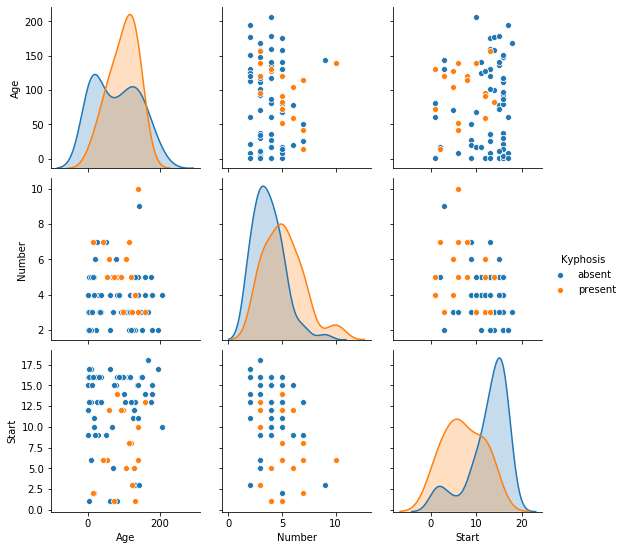

In [8]:
sns.pairplot(df, hue='Kyphosis')

In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [10]:
label = df['Kyphosis']
features = df.drop('Kyphosis', axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=101)

In [12]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Decision Tree Implementation
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [15]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
# Prediction and Evaluation
prediction = dtree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(confusion_matrix(y_test, prediction))

[[14  1]
 [ 3  3]]


In [19]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      absent       0.82      0.93      0.87        15
     present       0.75      0.50      0.60         6

    accuracy                           0.81        21
   macro avg       0.79      0.72      0.74        21
weighted avg       0.80      0.81      0.80        21



In [29]:
## Decision Tree Visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

In [30]:
feature_col = list(features.columns)
print(feature_col)

['Age', 'Number', 'Start']


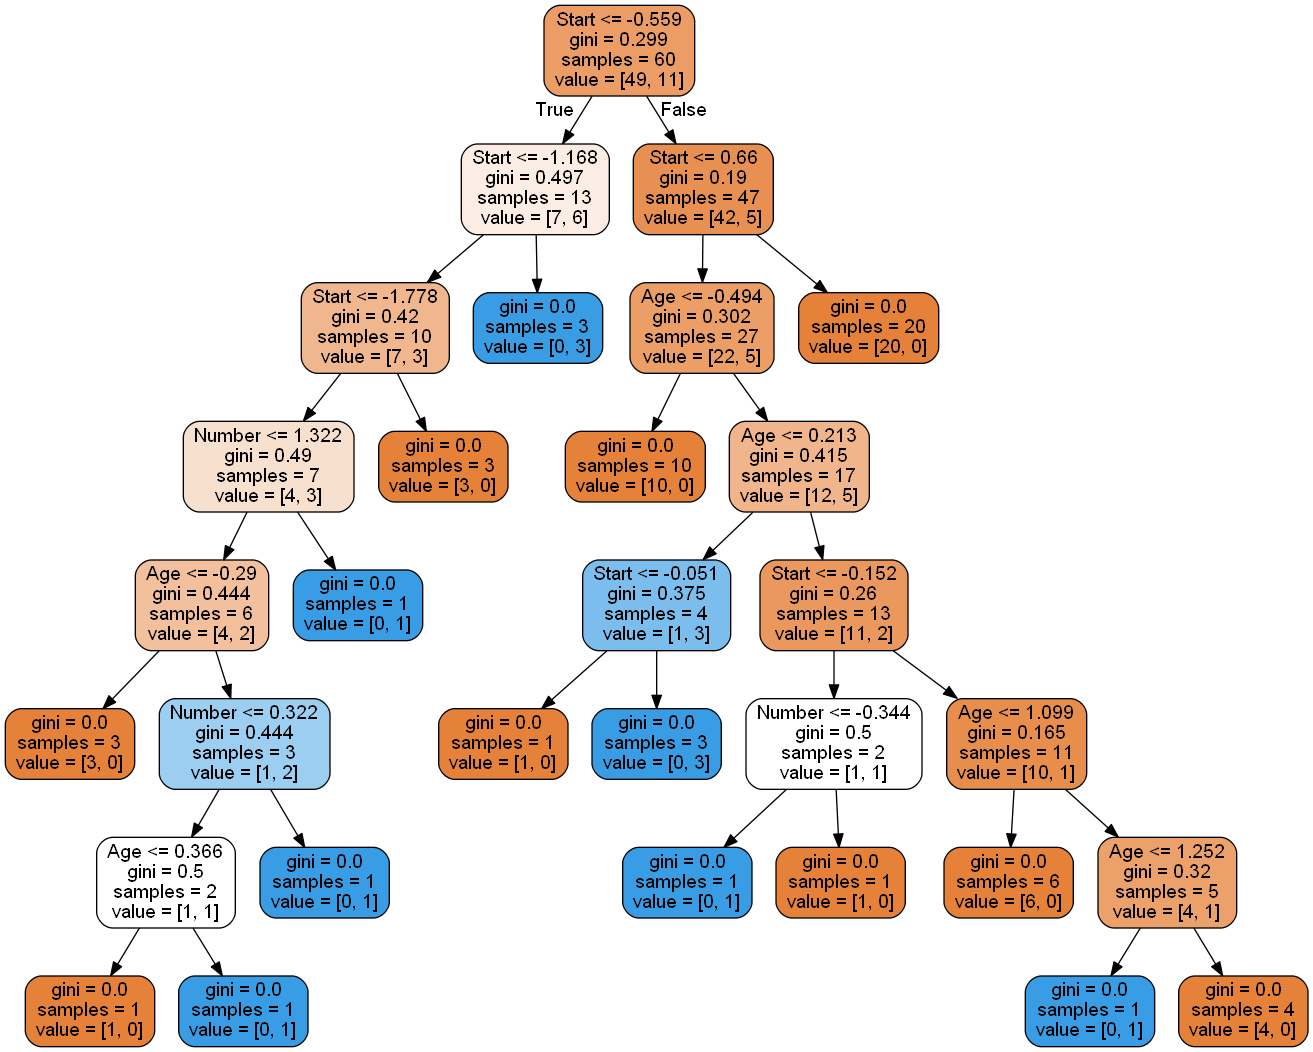

In [31]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=feature_col,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [32]:
# Random Forest Implementation
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [33]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
rfc_prediction = rfc.predict(X_test)

In [35]:
print(confusion_matrix(y_test, rfc_prediction))

[[15  0]
 [ 4  2]]


In [36]:
print(classification_report(y_test, rfc_prediction))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        15
     present       1.00      0.33      0.50         6

    accuracy                           0.81        21
   macro avg       0.89      0.67      0.69        21
weighted avg       0.85      0.81      0.77        21



In [37]:
# Project 2 : Lending Club data -- to predict whether borrower will pay back their loans

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
import os
os.listdir()

['.ipynb_checkpoints',
 '01-Decision Trees and Random Forests in Python.ipynb',
 '02-Decision Trees and Random Forest Project.ipynb',
 '03-Decision Trees and Random Forest Project - Solutions.ipynb',
 'Decision_Tree_RF_Implementation.ipynb',
 'kyphosis.csv',
 'loan_data.csv']

In [40]:
loans = pd.read_csv('loan_data.csv')
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [41]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [42]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [43]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [46]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [47]:
loans['purpose'] = encoder.fit_transform(loans['purpose'])

In [50]:
loans.corr()['not.fully.paid']

credit.policy       -0.158119
purpose              0.047907
int.rate             0.159552
installment          0.049955
log.annual.inc      -0.033439
dti                  0.037362
fico                -0.149666
days.with.cr.line   -0.029237
revol.bal            0.053699
revol.util           0.082088
inq.last.6mths       0.149452
delinq.2yrs          0.008881
pub.rec              0.048634
not.fully.paid       1.000000
Name: not.fully.paid, dtype: float64

In [52]:
# Feature and Label

In [53]:
y = loans['not.fully.paid']
X = loans.drop('not.fully.paid', axis=1)

In [54]:
# Splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [55]:
# Scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [58]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
# Prediction and Evaluation
dtree_prediction = dtree.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(classification_report(y_test, dtree_prediction))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.25      0.23       443

    accuracy                           0.73      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.76      0.73      0.74      2874



In [62]:
print(confusion_matrix(y_test, dtree_prediction))

[[1996  435]
 [ 331  112]]


In [63]:
# Training Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier()

In [64]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
# Prediction and Evaluation 
prediction = rfc_classifier.predict(X_test)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.41      0.02      0.04       443

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874



In [68]:
print(confusion_matrix(y_test,prediction))

[[2418   13]
 [ 434    9]]


In [70]:
# Neither of this model done well -- Hands on ML with Scikit Learn by Aurelien Geron has some feature selection techniques
# no. of estimator selection techniques with Random Forest. 
#I would suggest using those here. 

# However -- for this bootcamp purpose I am stopping here. Thank you!